# Load gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
root_dir="/content/drive/MyDrive/Semester-Docs/Sem5/Capstone/"
proj_dir=root_dir+"rsna-pneumonia-detection-challenge/"
rsna_train_dir=proj_dir+"stage_2_train_images/"
rsna_metadata_path=proj_dir+"stage_2_train_labels.csv"

In [3]:
import pickle
with open(proj_dir+'rsa_pneumonia.pkl_final', 'rb') as file:
  merged_df = pickle.load(file)

In [6]:
print(len(merged_df[merged_df['label'] == 1]))

6012


# Loading file and creating a dataframe

In [ ]:
# import os
# import numpy as np
# import pandas as pd
# import time
# from pathlib import Path

# # Get a list of all files in the directory
# def create_file_map_all(root_dir, metadata, limit=100):
#     file_map_all = {0:{},1:{}} # Initialize an empty map
#     root_dir = Path(root_dir)
#     files = [file for file in root_dir.iterdir() if file.is_file()]
#     for filename_full_path in files:
#         filename = Path(filename_full_path).name
#         meta_row = metadata[metadata['patientId'] == os.path.splitext(filename)[0]]
#         if (len(meta_row)) > 0:
#           meta_row_first = meta_row[0]
#           label = meta_row_first[5]
#           full_path = os.path.join(root_dir, filename)
#           if len(file_map_all[label]) != limit:
#             file_map_all[label][filename] = full_path
#     return file_map_all

# start_time = time.time()

# metadata = np.genfromtxt(rsna_metadata_path, delimiter=',', names=True,
#         dtype='U40,i4,i4,i4,i4,i4')

# file_map_all = create_file_map_all(rsna_train_dir, metadata, 100000)

# mrnet_file_map = file_map_all[0]
# knee_mri_files_map = file_map_all[1]

# mrnet_df = pd.DataFrame(mrnet_file_map.items(), columns=['file_name', 'file_path'])
# mrnet_label = pd.DataFrame({'label': np.zeros(len(mrnet_df))})
# mrnet_df_new = pd.concat([mrnet_df, mrnet_label], axis=1)

# knee_mri_df = pd.DataFrame(knee_mri_files_map.items(), columns=['file_name', 'file_path'])
# knee_mri_label = pd.DataFrame({'label': np.ones(len(knee_mri_df))})
# knee_mri_df_new = pd.concat([knee_mri_df, knee_mri_label], axis=1)

# merged_df = pd.concat([mrnet_df_new, knee_mri_df_new], ignore_index=True)

# elapsed_time = time.time() - start_time
# print(f"Time taken: {elapsed_time:.4f} seconds")

# print(merged_df)

# Download all tools

In [ ]:
!git clone https://github.com/subrat-mishra/MedSam-Utils
import sys
sys.path.append(root_dir)
sys.path.append("MedSam-Utils")

Cloning into 'MedSam-Utils'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11 (delta 1), reused 8 (delta 1), pack-reused 0
Receiving objects: 100% (11/11), done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!pip3 install tensorboardX
!pip3 install git+https://github.com/bowang-lab/MedSAM.git
!pip install umap-learn
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.2 MB/s eta 0:00:00
  Cloning https://github.com/bowang-lab/MedSAM.git to /tmp/pip-req-build-1e5rm9y6
  Running command git clone --filter=blob:none --quiet https://github.com/bowang-lab/MedSAM.git /tmp/pip-req-build-1e5rm9y6
  Resolved https://github.com/bowang-lab/MedSAM.git to commit 861d42440061c704762a9bb9a574e7c31d8d751a
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 102.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 8.3 MB/s eta 0:00:00
    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=93969c8639ccf15f188743927bd1939502d0a26ff55bccfc2d109d601fc742ae
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.0 MB/s eta 0:00:00


In [ ]:
# download model and data
img_id = '1Qf0IQF1zTwOJ4Fh4Ix5rtVhR9cnNbI2M'
!gdown $img_id
model_id = "1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_&confirm=t"
!gdown $model_id

Downloading...
From: https://drive.google.com/uc?id=1Qf0IQF1zTwOJ4Fh4Ix5rtVhR9cnNbI2M
To: /content/img_demo.png
100% 87.9k/87.9k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UAmWL88roYR7wKlnApw5Bcuzf2iQgk6_
To: /content/medsam_vit_b.pth
100% 375M/375M [00:05<00:00, 67.1MB/s]


# MedSam Embeddings

In [ ]:
import csv
import os
import pickle
import numpy as np
import pandas as pd
import pydicom
import time
import torch
import torch.nn as nn
from segment_anything import sam_model_registry
from skimage import io, transform
from PIL import Image
import torch.nn.functional as F

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MedSAM_CKPT_PATH = "medsam_vit_b.pth"
medsam_model = sam_model_registry['vit_b'](checkpoint=MedSAM_CKPT_PATH)
medsam_model = medsam_model.to(device)
medsam_model.eval()

def get_medsam_embeddings(img_3c):
  img_1024 = transform.resize(img_3c, (1024, 1024), order=3, preserve_range=True, anti_aliasing=True).astype(np.uint8)
  img_1024 = (img_1024 - img_1024.min()) / np.clip(
      img_1024.max() - img_1024.min(), a_min=1e-8, a_max=None
  )
  # convert the shape to (3, H, W)
  img_1024_tensor = torch.tensor(img_1024).float().permute(2, 0, 1).unsqueeze(0).to(device)

  with torch.no_grad():
      image_embedding = medsam_model.image_encoder(img_1024_tensor) # (1, 256, 64, 64)
  return image_embedding

def get_knee_mri_embedding(file_path):
  metadata_csv_path = root_dir + "KneeMRI/metadata.csv"
  metadata = np.genfromtxt(metadata_csv_path, delimiter=',', names=True,
        dtype='i4,i4,i4,i4,i4,i4,i4,i4,i4,i4,U20')
  file_name = os.path.basename(file_path)
  exam = metadata[metadata['volumeFilename'] == file_name]
  with open(file_path, 'rb') as file_handler: # Must use 'rb' as the data is binary
      volumetric_data = pickle.load(file_handler)
  z_start = exam['roiZ']
  depth = exam['roiDepth']
  mid_depth = depth if depth == 1 else (int)(depth/2)
  img_np = volumetric_data[z_start + mid_depth, :, :]
  img_np = img_np.reshape(-1, img_np.shape[-1])
  return img_np

def get_image_arr(file_path):
  if file_path.endswith("npy"):
    np_load = np.load(file_path)
    mid = (int)(np_load.shape[0]/2) - 1
    img_np =  np_load[mid] # Mid slice
  elif file_path.endswith("pck"):
    # Special case for KneeMRI image
    img_np = get_knee_mri_embedding(file_path)
  elif file_path.endswith("dcm"):
    img_np = pydicom.dcmread(file_path).pixel_array
  else:
    image = Image.open(file_path)
    img_np = np.array(image)

  return img_np

def get_output_tensor(file_path):
  img_np = get_image_arr(file_path)
  if len(img_np.shape) == 2:
      img_3c = np.repeat(img_np[:, :, None], 3, axis=-1)
  else:
      img_3c = img_np
  embeddings = get_medsam_embeddings(img_3c)
  global_avg_pool = nn.AdaptiveAvgPool2d((1, 1))
  output_tensor = global_avg_pool(embeddings)
  output_tensor = output_tensor.view(embeddings.size(1))
  return output_tensor.cpu().numpy()

def compute_embedding(index, total, file_path, start_time):
  output_tensor_arr = get_output_tensor(file_path)
  if index % 10 == 0:
    print(f"Time taken: {index}/{total} is {time.time() - start_time:.4f} seconds")
  return output_tensor_arr

# Update dataframe with embeddings

In [ ]:
start_time = time.time()

merged_df_copy = merged_df.copy()
batch_size = 100
file_batch_size = batch_size
start = 0
for i in range(start, len(merged_df_copy), batch_size):
  merged_df_copy.loc[i:i+batch_size, 'embeddings'] = merged_df_copy.loc[i:i+batch_size].apply(lambda row: compute_embedding(row.name, len(merged_df), row['file_path'], start_time), axis=1)

  if (i + batch_size) % file_batch_size == 0:
    pkl_file_name = 'rsa_pneumonia.pkl_'+str(i + batch_size)
    print("Writing file=", pkl_file_name)
    merged_df_copy.to_pickle(proj_dir+pkl_file_name)

pkl_file_name = 'rsa_pneumonia.pkl_final'
print("Writing file=", pkl_file_name)
merged_df_copy.to_pickle(proj_dir+pkl_file_name)

merged_df = merged_df_copy

# TSNE graph

In [ ]:
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import numpy as np
# import plotly.express as px
# import pandas as pd

# file_names = merged_df['file_name']
# embeddings = merged_df['embeddings']
# labels = merged_df['label'].to_numpy()
# labels = ['Tear' if elem > 0 else 'No Tear' for elem in labels]

# embeddings = np.stack(embeddings)

# tsne = TSNE(n_components=2)

# # Fit the t-SNE model to the embedding feature
# tsne_results = tsne.fit_transform(embeddings)

# df = pd.DataFrame({'x_axis': tsne_results[:, 0], 'y_axis': tsne_results[:, 1],
#                    'labels':labels, 'file_names': file_names},
#                   columns=['x_axis', 'y_axis', 'labels', 'file_names'])
# fig = px.scatter(df, x="x_axis", y="y_axis", color="labels", hover_name="file_names")
# fig.show()

## Debug Images

In [ ]:
# import pickle
# import os
# import re
# import time

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.patches as patch

# all_files_map = {}
# all_files_map.update(mrnet_file_map)
# all_files_map.update(knee_mri_files_map)

# view_images = ["0057.npy","483367-7.pck"]

# def plot_img(img_3c):
#   image_path = 'output_image.png'
#   plt.imshow(img_3c, cmap='gray')
#   # plt.axis('off')
#   plt.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=300)
#   plt.show()

# # path to metadata csv file
# for each_view in view_images:
#   file_path = all_files_map.get(each_view)
#   img_3c = get_image_arr(file_path)
#   print(img_3c.shape)
#   plot_img(img_3c)

# Create a simpleNN model with 3 FC layers

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

class SimpleNN(nn.Module):
  def __init__(self, input_size):
    super(SimpleNN, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.sigmoid(x)
    return x

class CustomDataset(Dataset):
  def __init__(self, dataframe):
    self.data = dataframe

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    filename = self.data.iloc[idx]['file_name']
    label = torch.tensor(self.data.iloc[idx]['label'], dtype=torch.float32)
    embeddings = self.data.iloc[idx]['embeddings']
    # if any(embeddings.isna()):
    #   embeddings = get_output_tensor(self.data.iloc[idx]['file_path'])
    return torch.from_numpy(embeddings), label, self.data.iloc[idx]['file_path']

def evaluate_model(model, loader):
  model.eval()
  # all_predictions, all_labels = [], []
  all_predictions, all_labels, file_paths = [], [], []
  with torch.no_grad():
    for inputs, labels, file_path in loader:
      outputs = model(inputs)
      predictions = (outputs > 0.4).float()
      all_predictions.extend(predictions.cpu().numpy())
      all_labels.extend(labels.cpu().numpy())
      file_paths.extend(file_path)
  model.train()
  return all_predictions, all_labels, file_paths

In [ ]:
# print(len(test_df[(test_df['label'] == 1.0)]))

727
2608


# Evaluate the model

In [ ]:
# Step 1: Load and preprocess the data
import pickle

dataset1='rsa_pneumonia.pkl_final'
# dataset1='chest_xray_pneumonia.pkl_final'
saved_model_name='simpleNN_model.pth'
with open(proj_dir + dataset1, 'rb') as file:
  df = pickle.load(file)
  # TODO: will remove later, taking samples for testing
  # train_df, test_val_df = train_test_split(df, test_size=0.01, random_state=42, stratify=df['label'])
  # df = test_val_df

# Step 1.1: Encode labels to numerical values (0 and 1)
df['label'] = df['label'].astype('category').cat.codes

# Step 1.2: Split the data into train, test, and validation sets
train_df, test_val_df = train_test_split(df, test_size=0.25, random_state=42, stratify=df['label'])
test_df, val_df = train_test_split(test_val_df, test_size=0.5, random_state=42)

# Step 2: Create DataLoader instances for training, validation, and testing
input_size = 256  # Assuming your embeddings are of size 256
train_dataset = CustomDataset(train_df)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = CustomDataset(val_df)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = CustomDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 3: Initialize the model, loss function, and optimizer
model = SimpleNN(input_size)
criterion = nn.BCELoss()
# criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_val_accuracy = 0.0
best_model_params = None
best_f1 = 0.0
best_epoch_id=0

# Step 4: Train the model
num_epochs = 100
for epoch in range(num_epochs):
  for inputs, labels, _ in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels.view(-1, 1))
    loss.backward()
    optimizer.step()

  val_predictions, val_labels, _ = evaluate_model(model, val_loader)
  # Calculate and print accuracy and F1 score
  val_accuracy = accuracy_score(val_labels, val_predictions)
  val_f1 = f1_score(val_labels, val_predictions)

  # if val_accuracy > best_val_accuracy:
  if val_f1 > best_f1:
    print(f'Epoch [{epoch + 1}/{num_epochs}] - '
        f'Old Accuracy: {best_val_accuracy:.4f}, Old F1 Score: {best_f1:.4f} | '
        f'New Accuracy: {val_accuracy:.4f}, New F1 Score: {val_f1:.4f}')
    best_val_accuracy = val_accuracy
    best_model_params = model.state_dict()
    best_f1 = val_f1
    best_epoch_id = epoch
  else:
    print(f'Epoch [{epoch + 1}/{num_epochs}] - '
        f'Curr Accuracy: {val_accuracy:.4f}, Curr F1 Score: {val_f1:.4f}')

  if epoch - 10 > best_epoch_id:
    break

# Save the model with best model params
torch.save(best_model_params, proj_dir + saved_model_name)

test_predictions, test_labels, _ = evaluate_model(model, test_loader)

test_accuracy = accuracy_score(test_labels, test_predictions)
test_f1 = f1_score(test_labels, test_predictions)

print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1:.4f}")

Epoch [1/100] - Old Accuracy: 0.0000, Old F1 Score: 0.0000 | New Accuracy: 0.8004, New F1 Score: 0.5714
Epoch [2/100] - Old Accuracy: 0.8004, Old F1 Score: 0.5714 | New Accuracy: 0.7935, New F1 Score: 0.5812
Epoch [3/100] - Curr Accuracy: 0.8058, Curr F1 Score: 0.5586
Epoch [4/100] - Curr Accuracy: 0.8103, Curr F1 Score: 0.5416
Epoch [5/100] - Curr Accuracy: 0.8112, Curr F1 Score: 0.5374
Epoch [6/100] - Old Accuracy: 0.7935, Old F1 Score: 0.5812 | New Accuracy: 0.8019, New F1 Score: 0.5957
Epoch [7/100] - Curr Accuracy: 0.8129, Curr F1 Score: 0.5452
Epoch [8/100] - Old Accuracy: 0.8019, Old F1 Score: 0.5957 | New Accuracy: 0.7893, New F1 Score: 0.6114
Epoch [9/100] - Curr Accuracy: 0.8058, Curr F1 Score: 0.5894
Epoch [10/100] - Curr Accuracy: 0.8058, Curr F1 Score: 0.5955
Epoch [11/100] - Curr Accuracy: 0.8165, Curr F1 Score: 0.5854
Epoch [12/100] - Curr Accuracy: 0.8150, Curr F1 Score: 0.5759
Epoch [13/100] - Curr Accuracy: 0.8192, Curr F1 Score: 0.5627
Epoch [14/100] - Curr Accuracy:

# Evaluate the model on a different datasets

In [ ]:
import pickle

saved_model_name='simpleNN_model.pth'
dataset2='chest_xray2_pneumonia.pkl_final'
# dataset2='rsa_pneumonia.pkl_final'
input_size = 256
# dataset2='rsa_pneumonia.pkl_final'
loaded_model = SimpleNN(input_size)
loaded_model.load_state_dict(torch.load(proj_dir+saved_model_name))
loaded_model.eval()

# Step 1: Load and preprocess the data
with open(proj_dir+dataset2, 'rb') as file:
  df2 = pickle.load(file)

dataset2 = CustomDataset(df2)
loader2 = DataLoader(dataset2, batch_size=32, shuffle=True)

val_predictions, val_labels = evaluate_model(loaded_model, loader2)

# Calculate and print accuracy and F1 score
val_accuracy = accuracy_score(val_labels, val_predictions)
val_f1 = f1_score(val_labels, val_predictions)

print(f"Other Dataset Accuracy: {val_accuracy:.4f}, Other Dataset F1 Score: {val_f1:.4f}")

Other Dataset Accuracy: 0.7282, Other Dataset F1 Score: 0.7266


# Inference

In [ ]:
import os
import numpy as np
import pandas as pd
from pathlib import Path

inference_dir=root_dir+"chest_xray/test/"
file1 = inference_dir+"NORMAL/IM-0001-0001.jpeg"
file2 = inference_dir+"PNEUMONIA/person1_virus_6.jpeg"

file1_path = Path(file1)
file2_path = Path(file2)

data_dict = {
    'file_name': [file1_path.name, file2_path.name],
    'file_path': [os.path.join('',file1), os.path.join('',file2)],
    'label': [0, 1]
}

inference_df = pd.DataFrame(data_dict)
start_time = time.time()
inference_df['embeddings'] = inference_df.apply(lambda row: compute_embedding(row.name, len(df), row['file_path'], start_time), axis=1)

Time taken: 0/2 is 4.2246 seconds


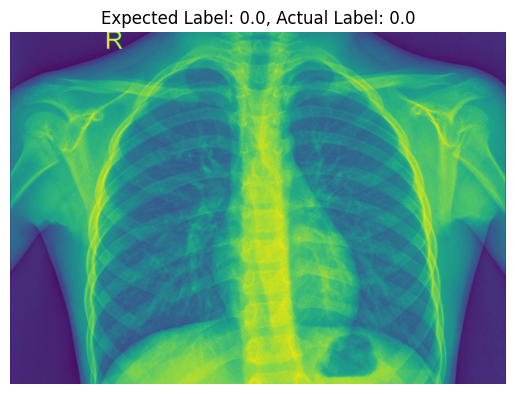

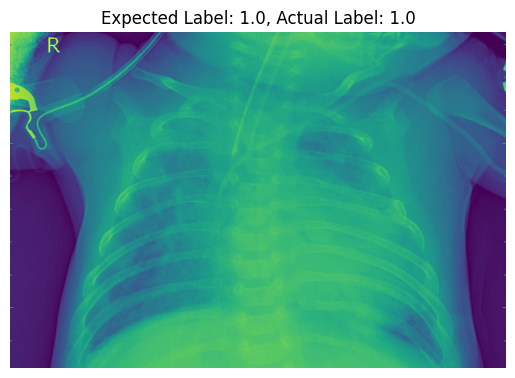

In [ ]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

saved_model_name='simpleNN_model.pth'
input_size = 256
loaded_model = SimpleNN(input_size)
loaded_model.load_state_dict(torch.load(proj_dir+saved_model_name))
loaded_model.eval()

inference_dataset = CustomDataset(inference_df)
inference_loader = DataLoader(inference_dataset, batch_size=32, shuffle=True)

val_predictions, val_labels, file_paths = evaluate_model(loaded_model, inference_loader)

for index, _ in enumerate(val_predictions):
  img = mpimg.imread(file_paths[index])
  plt.imshow(img)
  plt.axis('off')  # Turn off axis labels
  plt.title(f'Expected Label: {val_predictions[index][0]}, Actual Label: {val_labels[index]}')
  plt.show()